In [1]:
from ml5_test import ml5_init
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test = ml5_init.ML5Class()

In [3]:
dobby = os.listdir('pic/dobby')[1:]
zucchini = os.listdir('pic/zucchini')[1:]
train = os.listdir('pic/train')[1:]

In [4]:
dobby_list = ['pic/dobby/'+i for i in dobby]
zucchini_list = ['pic/zucchini/'+i for i in zucchini]
train_list = ['pic/train/'+i for i in train]

In [5]:
img = cv2.imread('pic/dobby/'+dobby[0])
img_rgba = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize_size = (224, 224)
img_rgba = cv2.resize(img_rgba, resize_size)
x, y, channel = img_rgba.shape
x, y, channel

(224, 224, 3)

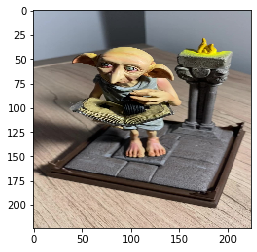

In [9]:
plt.imshow(img_rgba)

In [12]:
test.js_init("""

    const featureExtractor = ml5.featureExtractor('MobileNet', modelLoaded);

    // When the model is loaded
    function modelLoaded() {
      console.log('Model Loaded!');
    }

    const classifier = featureExtractor.classification();
    
    // Add a new image with a label
//    for (i = 0; i < dobby_list.length; i++) {
//        var img = document.createElement("img");
//        img.src = dobby_list[i];
//        img.width = 100;
//        img.height = 100;
//        console.log(img.src);
//        classifier.addImage(img, 'dobby');
//    }
//    for (i = 0; i < zucchini_list.length; i++) {
//        var img = document.createElement("img");
//        img.src = zucchini_list[i];
//        img.width = 100;
//        img.height = 100;
//        classifier.addImage(img, 'zucchini');
//    }
    for (i = 0; i < train_list.length; i++) {
        var imageData = new Image(width, height)
        imageData.src = train_list[i];
        classifier.addImage(imageData, 'train');
    }
    //var canvas = $("<canvas></canvas>").appendTo(element);
    //var ctx = canvas[0].getContext('2d');
    //var imageData = new Image(width, height)
    //imageData.src = dobby_list[0];
    console.log("image data:", imageData);
    //classifier.addImage(imageData, 'dobby');
    //console.log(classifier);
    classifier.train();
""", dobby_list = dobby_list, 
             zucchini_list=zucchini_list, 
             train_list = train_list,
            d = img_rgba.flatten().tolist(),width=224,height=224)

In [8]:
dobby_list[0]

'pic/dobby/d9.jpg'